In [ ]:
from google.colab import drive
import pandas as pd
import sklearn
import io
drive.mount('/content/drive', force_remount = True)
path = "/content/drive/MyDrive/winequalityN.csv"
df = pd.read_csv(path)
df = df.dropna()
print(df)

Mounted at /content/drive
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfu

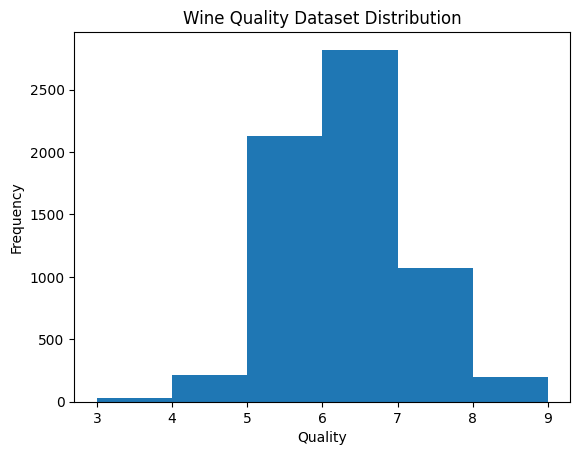

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df.quality, bins = range(3, 10))

plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Wine Quality Dataset Distribution')
# plt.grid(True)
output_path = '/content/drive/MyDrive/quality_distribution.png'
plt.savefig(output_path)
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

encoder = LabelEncoder()
scaler = MinMaxScaler()
df['type'] = encoder.fit_transform(df['type'])

scaled_data = scaler.fit_transform(df[[
    'type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]])
# scaled_data = scaler.fit_transform(df[[
#     'type', 'fixed acidity', 'volatile acidity', 'residual sugar',
#     'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
# ]])

# x = np.concatenate([scaled_data, df[['type']]], axis=1)
x = scaled_data
y = df.quality
# x = df.drop('total sulfur dioxide', axis=1)
# x = df[[
#     'type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
#     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
# ]]
# y = df.quality

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
# Normal Model
# from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# # Create the Gradient Boosting Regressor model
# gb = GradientBoostingRegressor(n_estimators=300, random_state=42)

# # Train the model
# gb.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = gb.predict(x_test)

# Create the XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions on the validation set
y_pred_val = xgb_model.predict(x_val)

print("Model Before SMOTE")

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred_val)
print("Mean Squared Error Validation:", mse)

# Make predictions on the test set
y_pred_test = xgb_model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_test)
print("R-squared (R2) score:", r2)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_test, squared = False)
print("Root Mean Squared Error (RMSE):", rmse)

Model Before SMOTE
Mean Squared Error Validation: 0.44589728930146544
Mean Squared Error: 0.402309875774571
R-squared (R2) score: 0.4683708834841709
Mean Absolute Percentage Error (MAPE): 0.08429219203252547
Root Mean Squared Error (RMSE): 0.6342790204433464


In [ ]:
from imblearn.over_sampling import SMOTE
# smote = SMOTE(k_neighbors = 2)
smote = SMOTE(k_neighbors = 4)

# Apply SMOTE to generate synthetic samples
x_smote, y_smote = smote.fit_resample(x, y)
print(len(x_smote))

19740


In [ ]:
from sklearn.model_selection import train_test_split
# x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)
x_train_smote, x_temp_smote, y_train_smote, y_temp_smote = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)
x_val_smote, x_test_smote, y_val_smote, y_test_smote = train_test_split(x_temp_smote, y_temp_smote, test_size = 0.5, random_state = 42)

In [ ]:
# Model with SMOTE
# # Create the Gradient Boosting Regressor model
# gb = GradientBoostingRegressor(n_estimators=300, random_state=42)

# # Train the model
# gb.fit(x_train, y_train)

# # Make predictions on the test set
# y_pred = gb.predict(x_test)

# Create the XGBoost regression model
xgb_model_smote = xgb.XGBRegressor()

# Train the model
xgb_model_smote.fit(x_train_smote, y_train_smote)

# Make predictions on the validation set
y_pred_val_smote = xgb_model_smote.predict(x_val_smote)

print("Model After SMOTE")

# Calculate the mean squared error
mse_val_smote = mean_squared_error(y_val_smote, y_pred_val_smote)
print("Mean Squared Error:", mse_val_smote)

# Make predictions on the test set
y_pred_smote = xgb_model_smote.predict(x_test_smote)

# Calculate the mean squared error
mse_smote = mean_squared_error(y_test_smote, y_pred_smote)
print("Mean Squared Error:", mse_smote)

# Calculate R-squared (R2) score
r2_smote = r2_score(y_test_smote, y_pred_smote)
print("R-squared (R2) score:", r2_smote)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_smote = mean_absolute_percentage_error(y_test_smote, y_pred_smote)
print("Mean Absolute Percentage Error (MAPE):", mape_smote)

# Calculate Root Mean Squared Error (RMSE)
rmse_smote = mean_squared_error(y_test_smote, y_pred_smote, squared = False)
print("Root Mean Squared Error (RMSE):", rmse_smote)

Model After SMOTE
Mean Squared Error: 0.2751923883100338
Mean Squared Error: 0.235547319798576
R-squared (R2) score: 0.9422407802403188
Mean Absolute Percentage Error (MAPE): 0.060640312925255985
Root Mean Squared Error (RMSE): 0.4853321746995309
